In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn

import numpy

In [21]:
from torch.nn.modules import Module
from torch.nn import functional as F
from torch._jit_internal import weak_module, weak_script_method


class _DropoutNd(Module):
    __constants__ = ['p', 'inplace']

    def __init__(self, p=0.5, inplace=False):
        super(_DropoutNd, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        self.inplace = inplace

    def extra_repr(self):
        inplace_str = ', inplace' if self.inplace else ''
        return 'p={}{}'.format(self.p, inplace_str)


@weak_module
class Dropout(_DropoutNd):
    r"""During training, randomly zeroes some of the elements of the input
    tensor with probability :attr:`p` using samples from a Bernoulli
    distribution. Each channel will be zeroed out independently on every forward
    call.
    This has proven to be an effective technique for regularization and
    preventing the co-adaptation of neurons as described in the paper
    `Improving neural networks by preventing co-adaptation of feature
    detectors`_ .
    Furthermore, the outputs are scaled by a factor of :math:`\frac{1}{1-p}` during
    training. This means that during evaluation the module simply computes an
    identity function.
    Args:
        p: probability of an element to be zeroed. Default: 0.5
        inplace: If set to ``True``, will do this operation in-place. Default: ``False``
    Shape:
        - Input: :math:`(*)`. Input can be of any shape
        - Output: :math:`(*)`. Output is of the same shape as input
    Examples::
        >>> m = nn.Dropout(p=0.2)
        >>> input = torch.randn(20, 16)
        >>> output = m(input)
    .. _Improving neural networks by preventing co-adaptation of feature
        detectors: https://arxiv.org/abs/1207.0580
    """

    @weak_script_method
    def forward(self, input):
        return F.dropout(input, self.p, self.training, self.inplace)


@weak_module
class Dropout2d(_DropoutNd):
    r"""Randomly zero out entire channels (a channel is a 2D feature map,
    e.g., the :math:`j`-th channel of the :math:`i`-th sample in the
    batched input is a 2D tensor :math:`\text{input}[i, j]`).
    Each channel will be zeroed out independently on every forward call with
    probability :attr:`p` using samples from a Bernoulli distribution.
    Usually the input comes from :class:`nn.Conv2d` modules.
    As described in the paper
    `Efficient Object Localization Using Convolutional Networks`_ ,
    if adjacent pixels within feature maps are strongly correlated
    (as is normally the case in early convolution layers) then i.i.d. dropout
    will not regularize the activations and will otherwise just result
    in an effective learning rate decrease.
    In this case, :func:`nn.Dropout2d` will help promote independence between
    feature maps and should be used instead.
    Args:
        p (float, optional): probability of an element to be zero-ed.
        inplace (bool, optional): If set to ``True``, will do this operation
            in-place
    Shape:
        - Input: :math:`(N, C, H, W)`
        - Output: :math:`(N, C, H, W)` (same shape as input)
    Examples::
        >>> m = nn.Dropout2d(p=0.2)
        >>> input = torch.randn(20, 16, 32, 32)
        >>> output = m(input)
    .. _Efficient Object Localization Using Convolutional Networks:
       http://arxiv.org/abs/1411.4280
    """

    @weak_script_method
    def forward(self, input):
        return F.dropout2d(input, self.p, self.training, self.inplace)


@weak_module
class Dropout3d(_DropoutNd):
    r"""Randomly zero out entire channels (a channel is a 3D feature map,
    e.g., the :math:`j`-th channel of the :math:`i`-th sample in the
    batched input is a 3D tensor :math:`\text{input}[i, j]`).
    Each channel will be zeroed out independently on every forward call with
    probability :attr:`p` using samples from a Bernoulli distribution.
    Usually the input comes from :class:`nn.Conv3d` modules.
    As described in the paper
    `Efficient Object Localization Using Convolutional Networks`_ ,
    if adjacent pixels within feature maps are strongly correlated
    (as is normally the case in early convolution layers) then i.i.d. dropout
    will not regularize the activations and will otherwise just result
    in an effective learning rate decrease.
    In this case, :func:`nn.Dropout3d` will help promote independence between
    feature maps and should be used instead.
    Args:
        p (float, optional): probability of an element to be zeroed.
        inplace (bool, optional): If set to ``True``, will do this operation
            in-place
    Shape:
        - Input: :math:`(N, C, D, H, W)`
        - Output: :math:`(N, C, D, H, W)` (same shape as input)
    Examples::
        >>> m = nn.Dropout3d(p=0.2)
        >>> input = torch.randn(20, 16, 4, 32, 32)
        >>> output = m(input)
    .. _Efficient Object Localization Using Convolutional Networks:
       http://arxiv.org/abs/1411.4280
    """

    @weak_script_method
    def forward(self, input):
        return F.dropout3d(input, self.p, self.training, self.inplace)


@weak_module
class AlphaDropout(_DropoutNd):
    r"""Applies Alpha Dropout over the input.
    Alpha Dropout is a type of Dropout that maintains the self-normalizing
    property.
    For an input with zero mean and unit standard deviation, the output of
    Alpha Dropout maintains the original mean and standard deviation of the
    input.
    Alpha Dropout goes hand-in-hand with SELU activation function, which ensures
    that the outputs have zero mean and unit standard deviation.
    During training, it randomly masks some of the elements of the input
    tensor with probability *p* using samples from a bernoulli distribution.
    The elements to masked are randomized on every forward call, and scaled
    and shifted to maintain zero mean and unit standard deviation.
    During evaluation the module simply computes an identity function.
    More details can be found in the paper `Self-Normalizing Neural Networks`_ .
    Args:
        p (float): probability of an element to be dropped. Default: 0.5
        inplace (bool, optional): If set to ``True``, will do this operation
            in-place
    Shape:
        - Input: :math:`(*)`. Input can be of any shape
        - Output: :math:`(*)`. Output is of the same shape as input
    Examples::
        >>> m = nn.AlphaDropout(p=0.2)
        >>> input = torch.randn(20, 16)
        >>> output = m(input)
    .. _Self-Normalizing Neural Networks: https://arxiv.org/abs/1706.02515
    """

    @weak_script_method
    def forward(self, input):
        return F.alpha_dropout(input, self.p, self.training)


@weak_module
class FeatureAlphaDropout(_DropoutNd):

    @weak_script_method
    def forward(self, input):
        return F.feature_alpha_dropout(input, self.p, self.training)

In [44]:
class NeuralNetwork(nn.Module):

    def __init__(self, inodes, hnodes, onodes, learning_rate):
        # call the base class's initialisation too
        super().__init__()
        
        # dimensions
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        
        # learning rate
        self.lr = learning_rate
        
        # define the layers and their sizes, turn off bias
        self.linear_ih = nn.Linear(inodes, hnodes, bias=False)
        self.dropout = Dropout(0.1) 
        self.linear_hh = nn.Linear(hnodes, hnodes, bias=False)
        self.dropoutFinal = Dropout(0.02) 
        self.linear_ho = nn.Linear(hnodes, onodes, bias=False)
        
        # define activation function middle
        self.activationRelu = nn.ReLU()
        
        # define activation function
        self.activation = nn.Softmax()
        
        # create error function
        self.error_function = torch.nn.BCELoss()

        # create optimiser, using simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), self.lr)

        pass

    
    def forward(self, inputs_list):
        # convert list to a 2-D FloatTensor then wrap in Variable 
        # also shift to GPU, remove .cuda. if not desired
        inputs = Variable(torch.FloatTensor(inputs_list).view(1, self.inodes))
        
        # combine input layer signals into hidden layer
        hidden_inputs = self.linear_ih(inputs)
        
        # my dropout layer
        dropout_inputs = self.dropout(hidden_inputs)
        
        # my hidden layer
        hidden_hidden_inputs = self.linear_hh(dropout_inputs)
        
        # apply sigmiod activation function
        hidden_outputs = self.activationRelu(hidden_hidden_inputs)
        
        # my dropout layer
        dropout__final_outputs = self.dropoutFinal(hidden_outputs)
        
        # combine hidden layer signals into output layer
        final_inputs = self.linear_ho(dropout__final_outputs)
        
        # apply sigmiod activation function
        final_outputs = self.activation(final_inputs)
        
        return final_outputs

    
    def train(self, inputs_list, targets_list):
 
        # calculate the output of the network
        output = self.forward(inputs_list)

        # create a Variable out of the target vector, doesn't need gradients calculated
        # also shift to GPU, remove .cuda. if not desired
        target_variable = Variable(torch.FloatTensor(targets_list).view(1, self.onodes), requires_grad=False)
        
        # calculate error
        loss = self.error_function(output, target_variable)
        
        print("Loss: " + str(loss))

        # zero gradients, perform a backward pass, and update the weights.
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()
   
        pass


#     def test():
#         test_loss = 0
#         correct = 0
#         with torch.no_grad():
#             for data, target in test_loader:
#                 output = network(data)
#                 test_loss += F.nll_loss(output, target, size_average=False).item()
#                 pred = output.data.max(1, keepdim=True)[1]
#                 correct += pred.eq(target.data.view_as(pred)).sum()
#             test_loss /= len(test_loader.dataset)
#             test_losses.append(test_loss)
#             print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#             test_loss, correct, len(test_loader.dataset),
#             100. * correct / len(test_loader.dataset)))
            
#         pass

In [45]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 512
output_nodes = 10

# learning rate
learning_rate = 0.01

# create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# move neural network to the GPU, delete if not desired
# n.cuda()

In [46]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [47]:
# %%timeit -n1 -r1 -c

# train the neural network

epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    first = 1
    for record in training_data_list:
        if first == 1:
            first = 0
            continue
            
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass


Loss: tensor(0.3356, grad_fn=<BinaryCrossEntropyBackward>)


/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


TypeError: test() takes 0 positional arguments but 1 was given

In [ ]:
## load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [37]:
# test the neural network

# scorecard for how well the network performs, initially empty

scorecard = []
flag = 1
# go through all the records in the test data set
for record in test_data_list:
    if flag == 1:
        flag = 0
        continue;
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.forward(inputs)
    tensorArray = outputs[0]
    
    # the index of the highest value corresponds to the label
    m, label = outputs.max(1)
    
    index = 0
    for tensorVal in tensorArray:
        if tensorVal == m:
            print("-------------------------------------")
            print("Predicted Value: " + str(index))
            print("Actual Value: " + str(correct_label))
            break;
        index += 1
        
    # append correct or incorrect to list
    # need to extract from pytorch tensor via numpy to compare to python integer
    if (index == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass
    

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 5
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 3
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 5
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 3
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 9
Actual Value: 4
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 5
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 7
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 9
Actual Value: 9
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 2
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 5
Actual Value: 5
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 8
Actual Value: 8
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Val

-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 2
Actual Value: 2
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 1
Actual Value: 1
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 1
Actual Value: 8
-------------------------------------
Predicted Value: 4
Actual Value: 4
-------------------------------------
Predicted Value: 6
Actual Value: 6
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 7
Actual Value: 7
-------------------------------------
Predicted Value: 0
Actual Value: 0
-------------------------------------
Predicted Value: 3
Actual Value: 3
-------------------------------------
Predicted Val

In [17]:
show_output_for_random_instance = 6001

In [18]:

record = test_data_list[show_output_for_random_instance]
all_values = record.split(',')
correct_label = int(all_values[0])
inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
outputs = n.forward(inputs)
tensorArray = outputs[0]
    
m, label = outputs.max(1)
    
index = 0
for tensorVal in tensorArray:
    if tensorVal == m:
        print("Predicted Value: " + str(index))
        #print("Actual Value: " + str(correct_label))
        break;
    index += 1
        
if (index == correct_label):
    scorecard.append(1)
else:
    scorecard.append(0)
    pass
    
pass

Predicted Value: 9


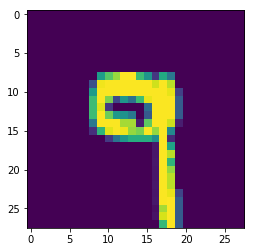

In [20]:
import matplotlib.pyplot as plt
import numpy as np

#B = np.reshape(test_data_list[1], (-1, 28))

test_d = test_data_list[show_output_for_random_instance].split(",")[1:]
test_d = np.array(test_d)
test_d = test_d.astype(np.float)
new_shape = np.reshape(test_d, (28, 28))
#print(new_shape)

from matplotlib import pyplot as plt
plt.imshow(new_shape, interpolation='nearest')
plt.show()

In [38]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print(scorecard_array)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

total_count_corr = 0
total_count_wro = 0
for i in scorecard_array:
    if i == 1:
        total_count_corr += 1
    else:
        total_count_wro += 1
        
print ("Correct: " + str(total_count_corr))
print ("Wrong: " + str(total_count_wro))
    

[1 1 1 ... 1 1 1]
performance =  0.9085
Correct: 9085
Wrong: 915
